## Importing Libraries

In [1]:
import os
import librosa
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Flatten, Dense,Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers.legacy import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.image import resize
import matplotlib.pyplot as plt
import seaborn as sns

### Visualizing Single Audio

In [2]:
random_file_name = r"D:/Tag/Genre Classifier/Data/genres_original/blues/blues.00002.wav"

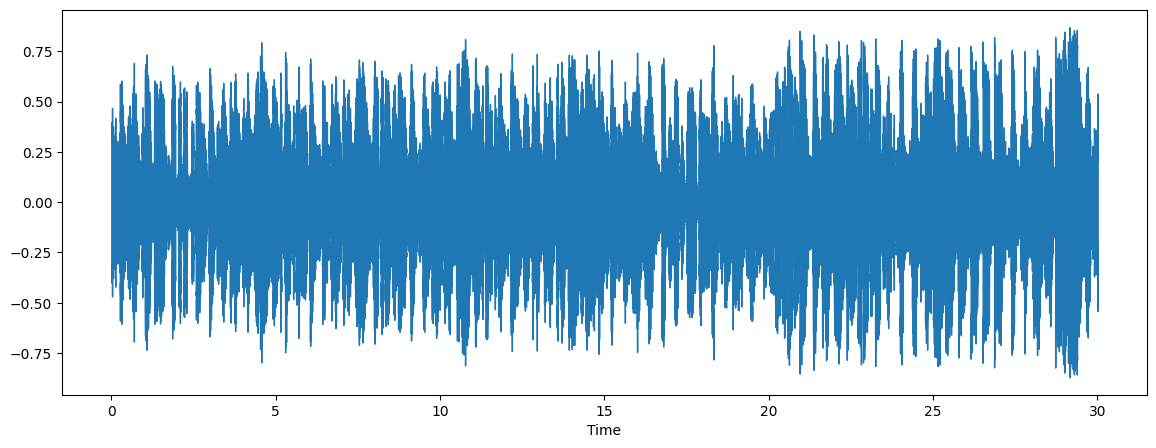

In [3]:
x, sr = librosa.load(random_file_name, sr=44100)
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr)

#### Playing Sound

In [4]:
from IPython.display import Audio
Audio(data=x, rate=sr)

### Doing Visualization on chunks of audio

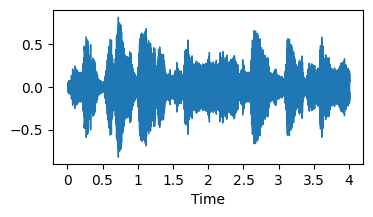

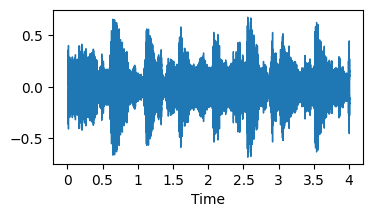

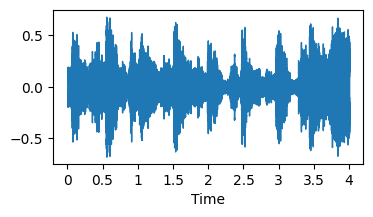

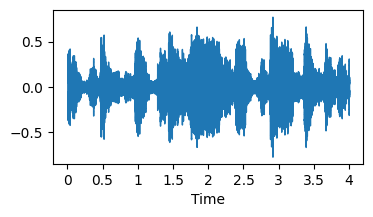

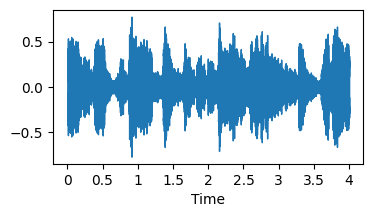

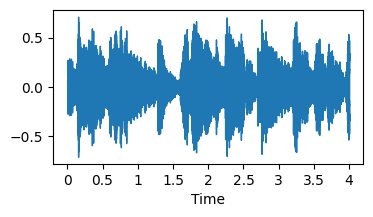

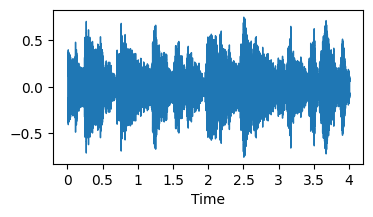

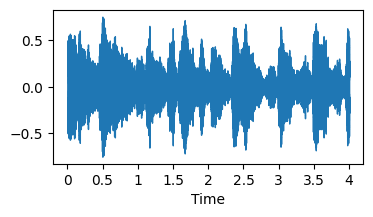

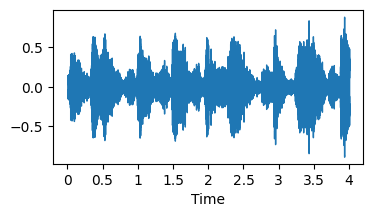

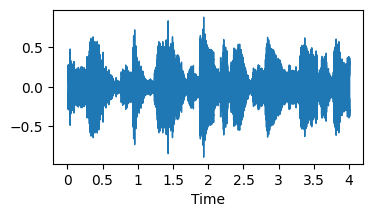

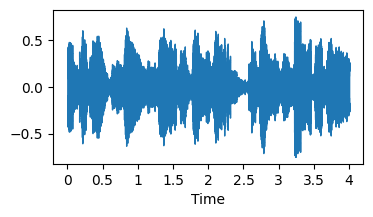

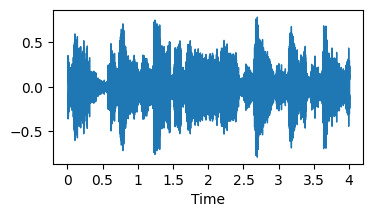

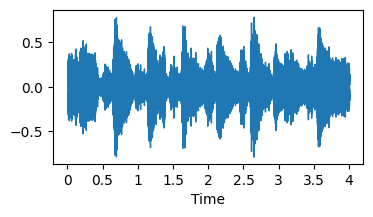

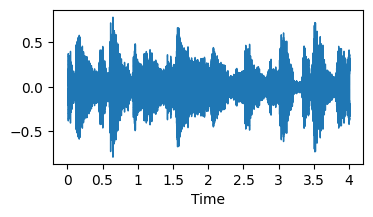

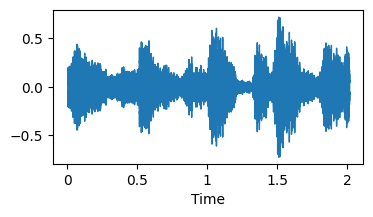

In [5]:
audio_path = r"D:\Tag\Genre Classifier\Data\genres_original\blues\blues.00000.wav"
y, sr = librosa.load(audio_path, sr=None)  # sr=None to keep the original sampling rate

# Define the duration of each chunk and overlap
chunk_duration = 4  # seconds
overlap_duration = 2  # seconds

# Convert durations to samples
chunk_samples = chunk_duration * sr
overlap_samples = overlap_duration * sr

# Calculate the number of chunks
num_chunks = int(np.ceil((len(y) - chunk_samples) / (chunk_samples - overlap_samples))) + 1

# Iterate over each chunk
for i in range(num_chunks):
    # Calculate start and end indices of the chunk
    start = i * (chunk_samples - overlap_samples)
    end = start + chunk_samples
    
    # Extract the chunk of audio
    chunk = y[start:end]
    plt.figure(figsize=(4, 2))
    librosa.display.waveshow(chunk, sr=sr)
    plt.show()
    

### Melspectrogram Visualization

In [6]:
#Plotting Melspectrogram of Entire audio
def plot_melspectrogram(y,sr):
    # Compute the spectrogram
    spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
    # Convert to decibels (log scale)
    spectrogram_db = librosa.power_to_db(spectrogram, ref=np.max)
    # Visualize the spectrogram
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram')
    plt.tight_layout()
    plt.show()

In [7]:
def plot_melspectrogram_chunks(y,sr):
    # Define the duration of each chunk and overlap
    chunk_duration = 4  # seconds
    overlap_duration = 2  # seconds
    
    # Convert durations to samples
    chunk_samples = chunk_duration * sr
    overlap_samples = overlap_duration * sr
    
    # Calculate the number of chunks
    num_chunks = int(np.ceil((len(y) - chunk_samples) / (chunk_samples - overlap_samples))) + 1
    
    # Iterate over each chunk
    for i in range(num_chunks):
        # Calculate start and end indices of the chunk
        start = i * (chunk_samples - overlap_samples)
        end = start + chunk_samples
        
        # Extract the chunk of audio
        chunk = y[start:end]
        
        # Compute the Mel spectrogram for the chunk
        mel_spectrogram = librosa.feature.melspectrogram(y=chunk, sr=sr)
        print(mel_spectrogram.shape)
        spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)
        # Visualize the spectrogram
        plt.figure(figsize=(10, 4))
        librosa.display.specshow(spectrogram_db, sr=sr, x_axis='time', y_axis='mel')
        plt.colorbar(format='%+2.0f dB')
        plt.title('Spectrogram')
        plt.tight_layout()
        plt.show()

(128, 173)


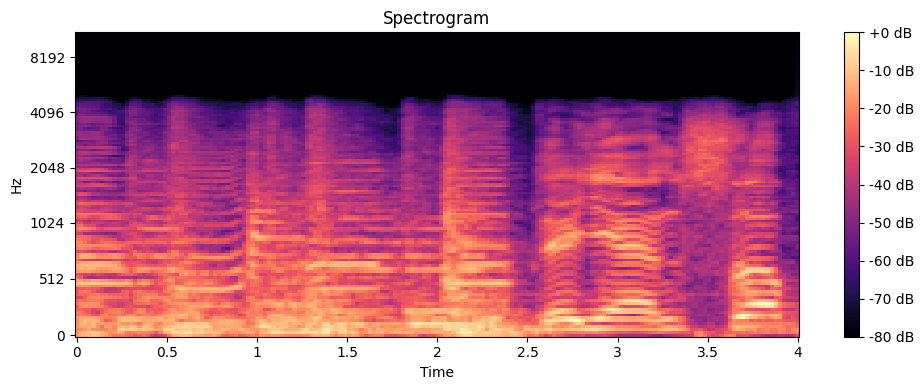

(128, 173)


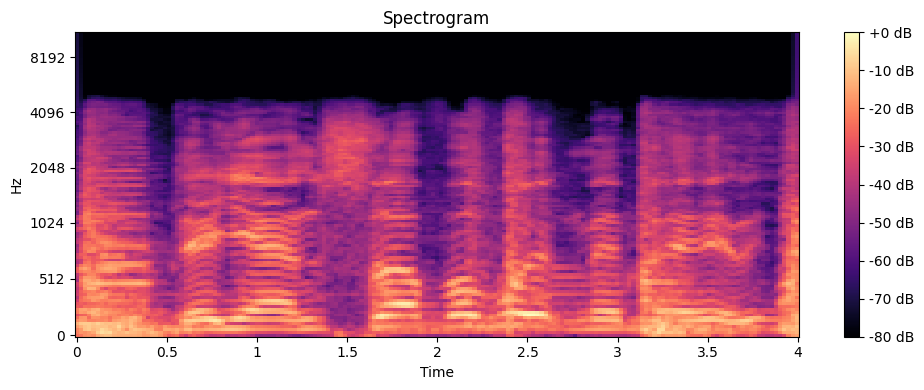

(128, 173)


(128, 173)


(128, 173)


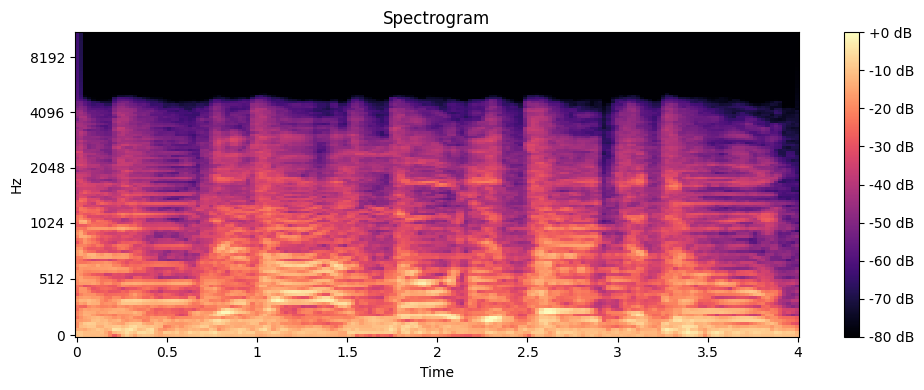

(128, 173)


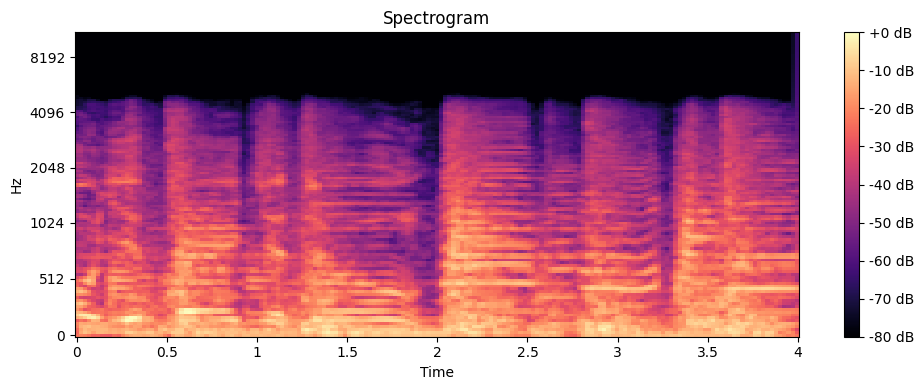

(128, 173)


(128, 173)


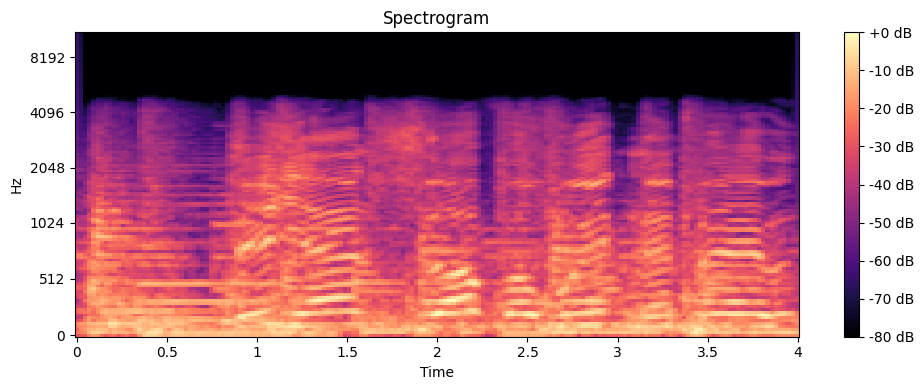

(128, 173)


(128, 173)


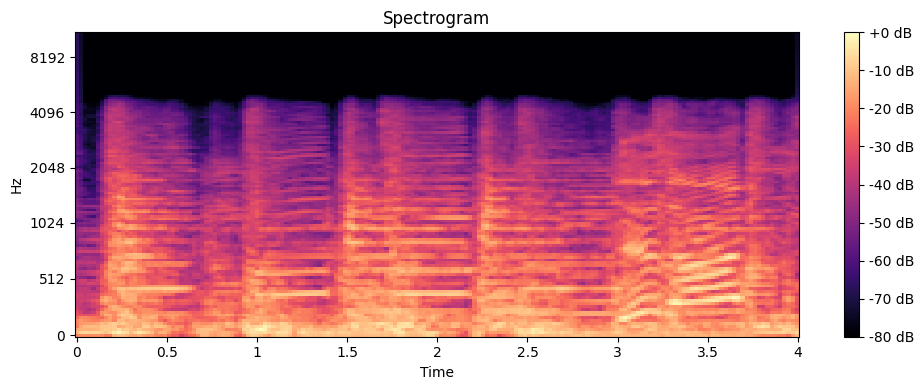

(128, 173)


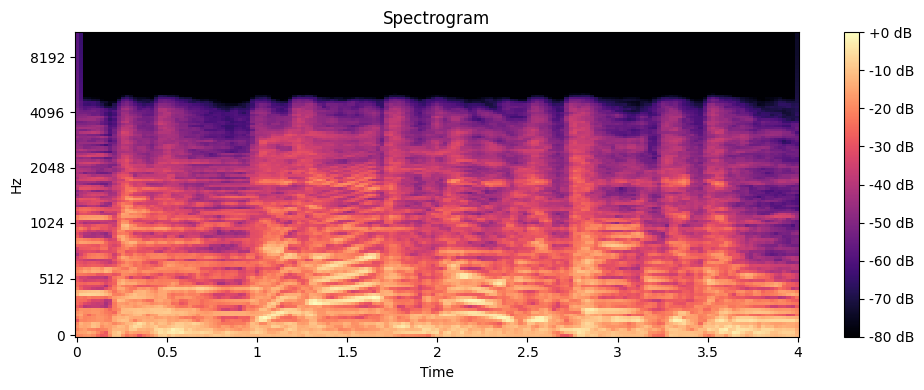

(128, 173)


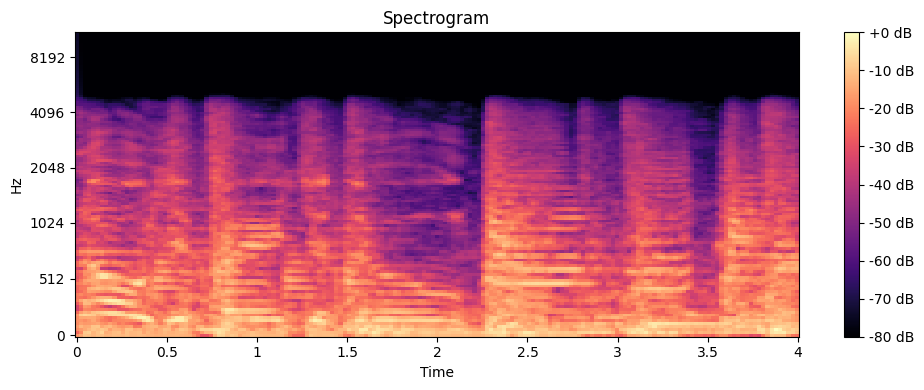

(128, 173)


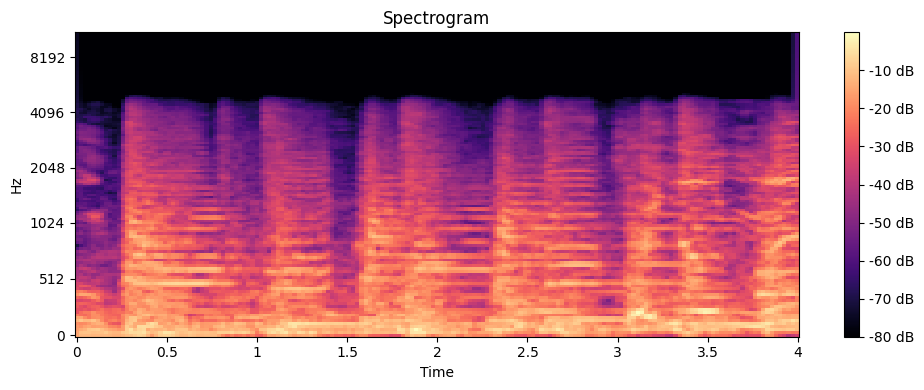

(128, 173)


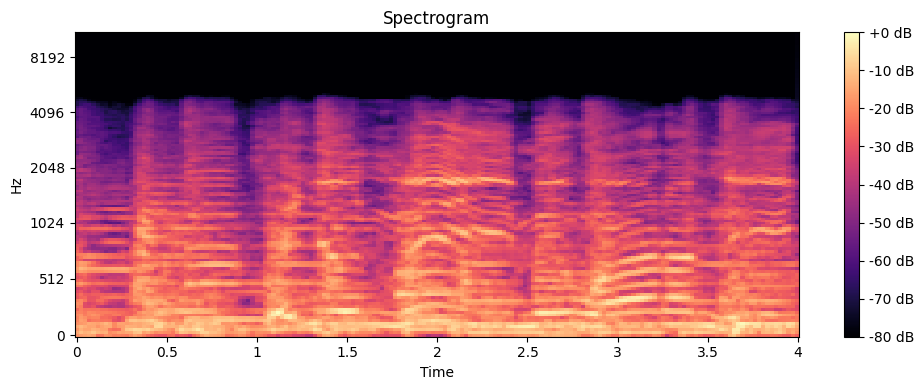

(128, 173)


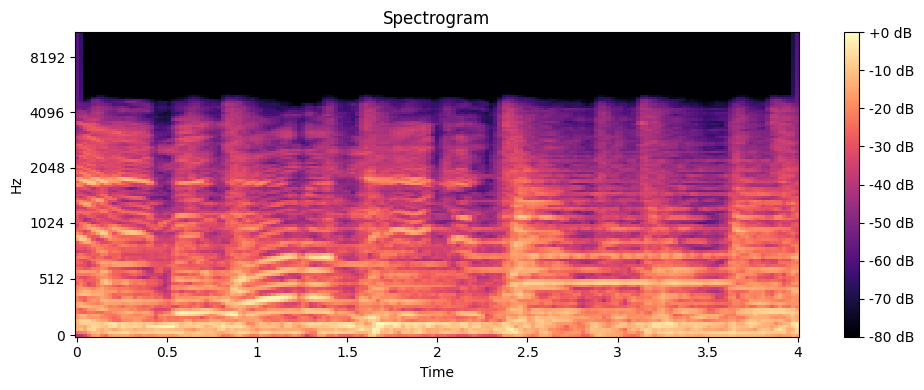

(128, 173)


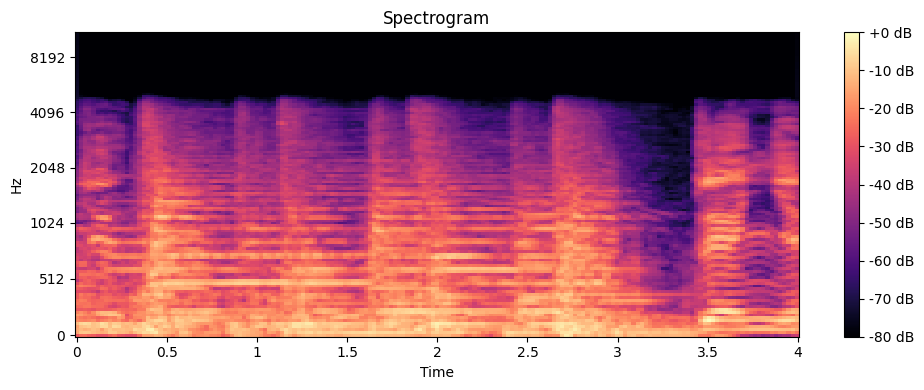

(128, 173)


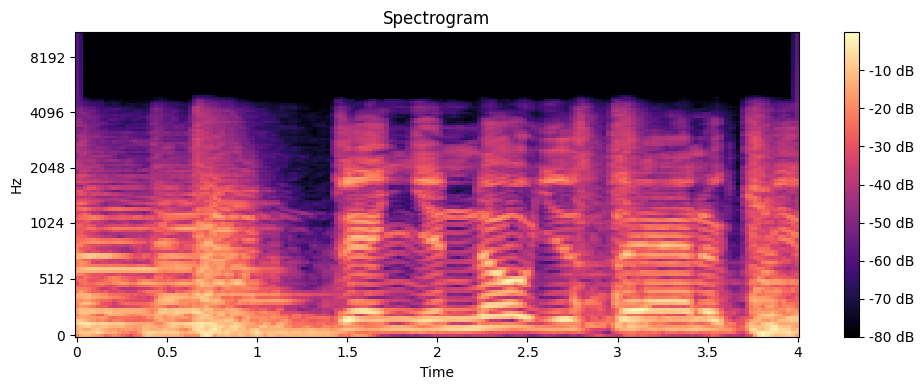

(128, 173)


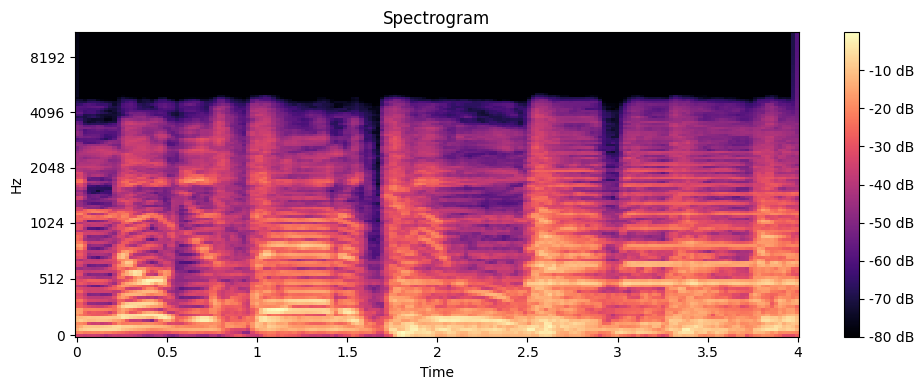

(128, 173)


(128, 173)


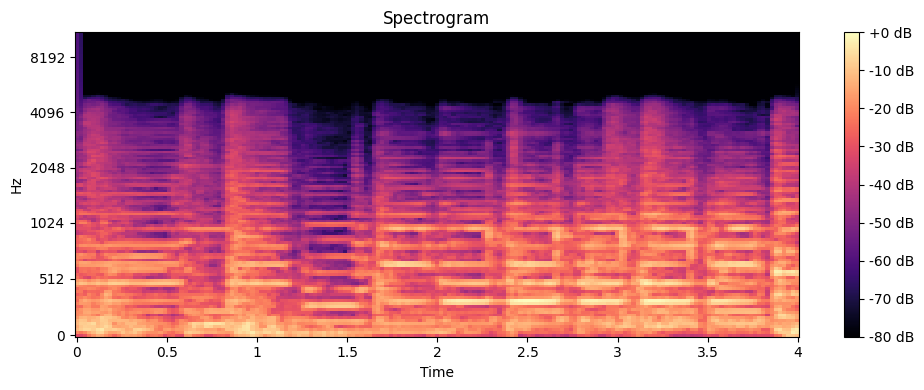

(128, 173)


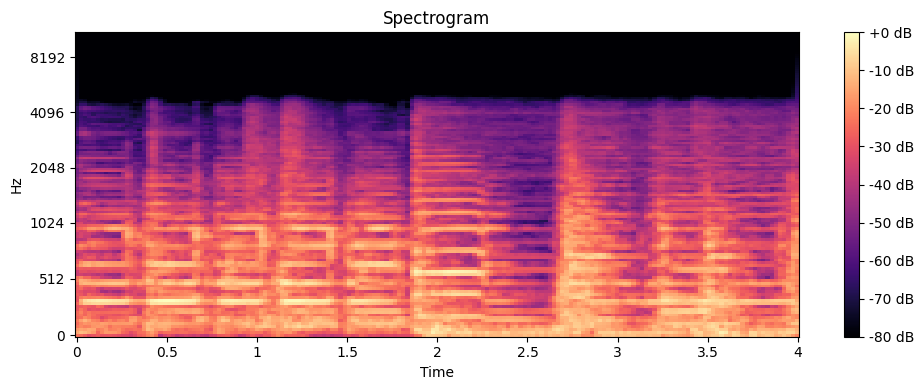

(128, 173)


(128, 173)


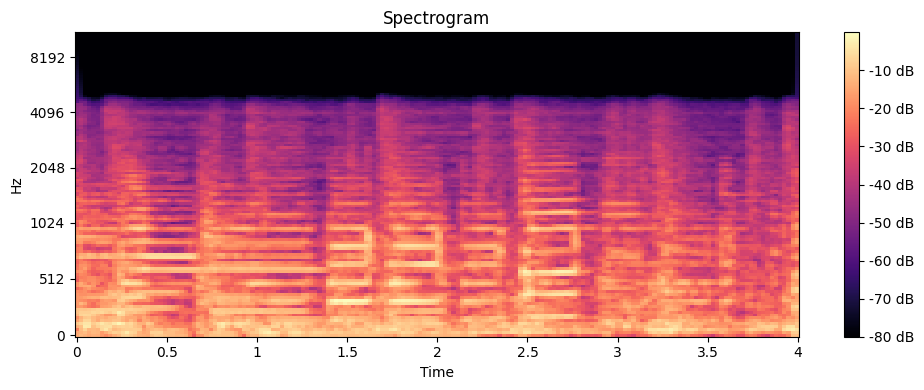

(128, 173)


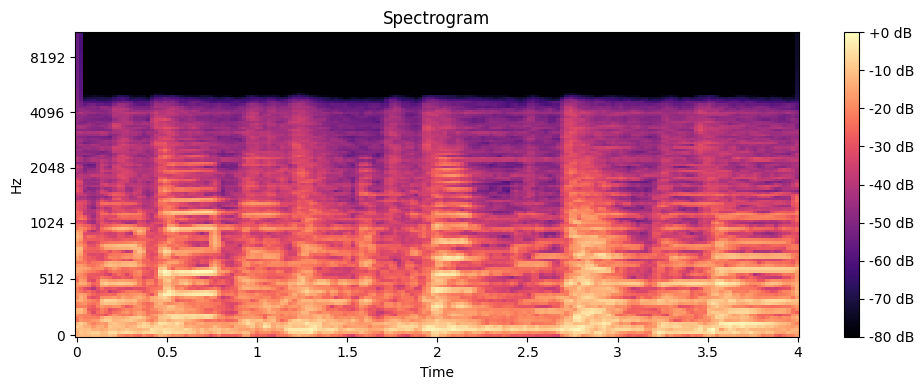

(128, 173)


(128, 173)


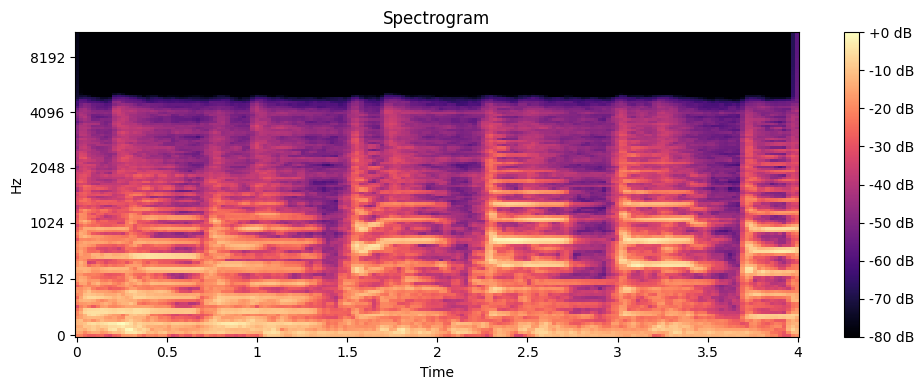

(128, 173)


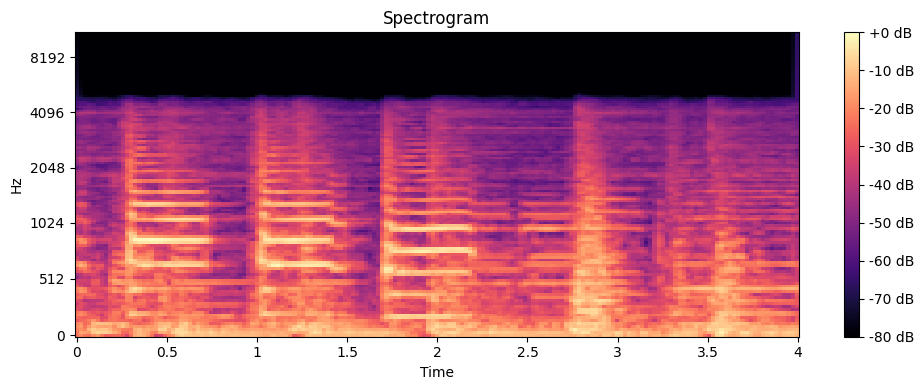

(128, 173)


(128, 173)


(128, 88)


In [8]:
#Spectrogram of Audio chunks
plot_melspectrogram_chunks(y=x,sr=sr)

In [9]:
#Spectrogram of Entire audio
plot_melspectrogram(y=x,sr=sr)

### Data Preprocessing

In [11]:
import os
import warnings
import librosa
import numpy as np
from sklearn.model_selection import train_test_split
from skimage.transform import resize
import audioread

# Define your folder structure
data_dir = r'D:/Tag/Genre Classifier/Data/genres_original/'
classes = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']

# Load and preprocess audio data
def load_and_preprocess_data(data_dir, classes, target_shape=(150, 150)):
    data = []
    labels = []

    for i_class, class_name in enumerate(classes):
        class_dir = os.path.join(data_dir, class_name)
        print("Processing --", class_name)
        for filename in os.listdir(class_dir):
            if filename.endswith('.wav'):
                file_path = os.path.join(class_dir, filename)
                try:
                    audio_data, sample_rate = librosa.load(file_path, sr=None)
                except Exception as e:
                    print(f"Error loading {file_path}: {e}")
                    continue
                
                # Define the duration of each chunk and overlap
                chunk_duration = 4  # seconds
                overlap_duration = 2  # seconds
                
                # Convert durations to samples
                chunk_samples = chunk_duration * sample_rate
                overlap_samples = overlap_duration * sample_rate
                
                # Calculate the number of chunks
                num_chunks = int(np.ceil((len(audio_data) - chunk_samples) / (chunk_samples - overlap_samples))) + 1
                
                # Iterate over each chunk
                for i in range(num_chunks):
                    # Calculate start and end indices of the chunk
                    start = i * (chunk_samples - overlap_samples)
                    end = start + chunk_samples
                    
                    # Extract the chunk of audio
                    chunk = audio_data[start:end]
                    
                    # Compute the Mel spectrogram for the chunk
                    mel_spectrogram = librosa.feature.melspectrogram(y=chunk, sr=sample_rate)
                    
                    # Resize the Mel spectrogram to the target shape
                    mel_spectrogram = resize(np.expand_dims(mel_spectrogram, axis=-1), target_shape)
                    
                    data.append(mel_spectrogram)
                    labels.append(i_class)

    return np.array(data), np.array(labels)

# Load and preprocess the data
data, labels = load_and_preprocess_data(data_dir, classes)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

# Print shapes of the splits to verify
print(f'Training data shape: {X_train.shape}, Training labels shape: {y_train.shape}')
print(f'Testing data shape: {X_test.shape}, Testing labels shape: {y_test.shape}')

# Optional: print some examples from the dataset
print("\nSample Training Data:", X_train[:2])
print("Sample Training Labels:", y_train[:2])
print("Sample Testing Data:", X_test[:2])
print("Sample Testing Labels:", y_test[:2])


Processing -- blues
Processing -- classical
Processing -- country
Processing -- disco
Processing -- hiphop
Processing -- jazz


C:\Users\anand\AppData\Local\Temp\ipykernel_12776\1765754467.py:25: UserWarning: PySoundFile failed. Trying audioread instead.
  audio_data, sample_rate = librosa.load(file_path, sr=None)
C:\Users\anand\AppData\Roaming\Python\Python312\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Error loading D:/Tag/Genre Classifier/Data/genres_original/jazz\jazz.00054.wav: 
Processing -- metal
Processing -- pop
Processing -- reggae
Processing -- rock
Training data shape: (11980, 150, 150, 1), Training labels shape: (11980,)
Testing data shape: (2995, 150, 150, 1), Testing labels shape: (2995,)

Sample Training Data: [[[[3.5392963e+02]
   [1.5078918e+02]
   [8.3326797e+00]
   ...
   [9.0305862e+00]
   [4.8232277e+01]
   [9.2003242e+01]]

  [[6.4282867e+02]
   [3.4481320e+02]
   [2.4032497e+01]
   ...
   [5.4154766e+01]
   [1.8837993e+02]
   [2.7204666e+02]]

  [[4.7228049e+02]
   [2.4064511e+02]
   [2.2244192e+01]
   ...
   [1.0659818e+02]
   [3.5627222e+02]
   [2.6705103e+02]]

  ...

  [[2.5943064e-03]
   [5.4452830e-04]
   [3.3627675e-05]
   ...
   [2.4564357e-05]
   [3.0642004e-05]
   [6.9905043e-05]]

  [[2.5715523e-03]
   [5.2518927e-04]
   [2.9510568e-06]
   ...
   [2.1084215e-06]
   [6.1496485e-06]
   [5.3449483e-05]]

  [[2.5478275e-03]
   [5.1840395e-04]
   [3.490683

In [12]:
data.shape

(14975, 150, 150, 1)

In [13]:
labels.shape

(14975,)

In [14]:
labels

array([0, 0, 0, ..., 9, 9, 9])

In [15]:
labels = to_categorical(labels, num_classes=len(classes))  # Convert labels to one-hot encoding
labels

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [16]:
labels.shape

(14975, 10)

In [17]:
data.shape

(14975, 150, 150, 1)

### Splitting Dataset into Training and Test set

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)

## Building Model

In [19]:
model = tf.keras.models.Sequential()

In [20]:
X_train[0].shape

(150, 150, 1)

In [21]:
model.add(Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=X_train[0].shape))
model.add(Conv2D(filters=32,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

c:\Users\anand\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [22]:
model.add(Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [23]:
model.add(Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [24]:
model.add(tf.keras.layers.Dropout(0.3))

In [25]:
model.add(Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=256,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [26]:
model.add(Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
model.add(Conv2D(filters=512,kernel_size=3,activation='relu'))
model.add(MaxPool2D(pool_size=2,strides=2))

In [27]:
model.add(Dropout(0.3))

In [28]:
model.add(Flatten())

In [29]:
model.add(Dense(units=1200,activation='relu'))

In [30]:
model.add(Dropout(0.45))

In [31]:
#Output Layer
model.add(Dense(units=len(classes),activation='softmax'))

In [32]:
from tensorflow.keras.optimizers import Adam

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])


In [33]:
# Train the model
training_history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 242s 639ms/step - accuracy: 0.1857 - loss: 2.1605 - val_accuracy: 0.4080 - val_loss: 1.6682
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 227s 606ms/step - accuracy: 0.4471 - loss: 1.5679 - val_accuracy: 0.5606 - val_loss: 1.3217
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 236s 630ms/step - accuracy: 0.5807 - loss: 1.2004 - val_accuracy: 0.6411 - val_loss: 1.0665
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 240s 640ms/step - accuracy: 0.6593 - loss: 1.0034 - val_accuracy: 0.7159 - val_loss: 0.8351
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 244s 650ms/step - accuracy: 0.7099 - loss: 0.8494 - val_accuracy: 0.7145 - val_loss: 0.8393
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 233s 622ms/step - accuracy: 0.7534 - loss: 0.7288 - val_accuracy: 0.7713 - val_loss: 0.6844
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 243s 647ms/step - accuracy: 0.7989 - loss: 0.6182 - val_accuracy: 0.7930 - val_loss: 0.6134
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 241s 642ms/step - accuracy: 0.8283 -

In [34]:
model.save("Trained_model(new).h5") #Windows

In [35]:
training_history.history

{'accuracy': [0.25175291299819946,
  0.48764607310295105,
  0.6030049920082092,
  0.669699490070343,
  0.714691162109375,
  0.7569282054901123,
  0.7936561107635498,
  0.8273789882659912,
  0.8550918102264404,
  0.8789649605751038],
 'loss': [2.0086562633514404,
  1.4588292837142944,
  1.142501711845398,
  0.9678064584732056,
  0.8311103582382202,
  0.7175858020782471,
  0.6133072972297668,
  0.5080146193504333,
  0.42799511551856995,
  0.36791208386421204],
 'val_accuracy': [0.40801334381103516,
  0.560600996017456,
  0.6410684585571289,
  0.7158597707748413,
  0.7145242094993591,
  0.7712854743003845,
  0.7929883003234863,
  0.8013355731964111,
  0.8390651345252991,
  0.8554257154464722],
 'val_loss': [1.6681891679763794,
  1.3216935396194458,
  1.066467523574829,
  0.835112988948822,
  0.8393202424049377,
  0.6844035983085632,
  0.6134224534034729,
  0.5923901200294495,
  0.4821242094039917,
  0.4392785131931305]}

In [36]:
#Recording History in json
import json
with open('training_hist_new.json','w') as f:
  json.dump(training_history.history,f)

## Model Evaluation

In [37]:
##Model Evaluation on Training set
train_accuracy=model.evaluate(X_train,y_train,verbose=0)
print(train_accuracy[1])

0.9274624586105347


In [38]:
##Model Evaluation on Test set
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.8554257154464722


## Accuracy and Loss Visualization

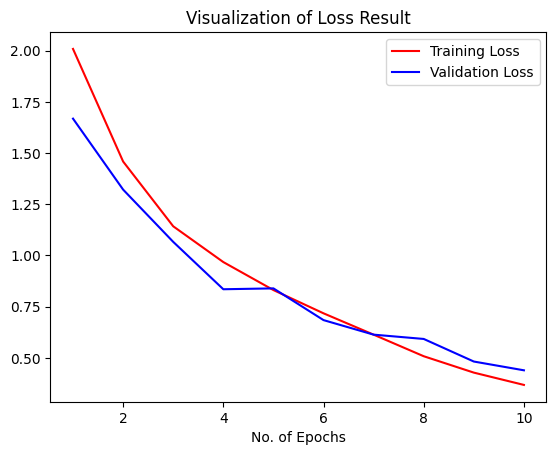

In [39]:
#Visualization of Loss
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['loss'],color='red',label='Training Loss')
plt.plot(epochs,training_history.history['val_loss'],color='blue',label='Validation Loss')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Loss Result')
plt.legend()
plt.show()

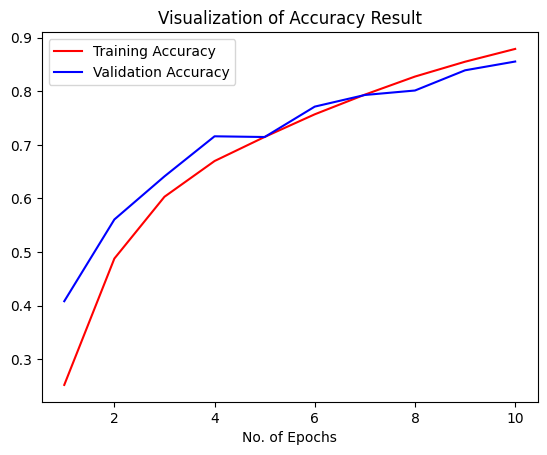

In [40]:
#Accuracy Visualization
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title('Visualization of Accuracy Result')
plt.legend()
plt.show()

## Precision, Recall, Confusion Metrics calculation

In [41]:
y_pred = model.predict(X_test)
y_pred

94/94 ━━━━━━━━━━━━━━━━━━━━ 15s 153ms/step


array([[4.64439362e-01, 2.57903077e-02, 1.83907375e-01, ...,
        2.75315121e-02, 6.57299673e-03, 1.82574034e-01],
       [8.82842926e-07, 2.21571823e-11, 6.92689017e-09, ...,
        1.55351587e-09, 1.28333486e-08, 1.33090934e-05],
       [6.74947103e-07, 1.60708313e-09, 1.32464365e-07, ...,
        8.24507140e-07, 1.70834511e-08, 1.42074120e-03],
       ...,
       [9.99955893e-01, 1.13348615e-10, 4.35016591e-05, ...,
        3.14816440e-08, 4.98324084e-08, 2.85997714e-07],
       [1.15910098e-02, 4.38889384e-01, 3.36191617e-02, ...,
        6.01843931e-03, 1.16925463e-02, 1.82696301e-02],
       [1.89622268e-02, 2.84838416e-06, 4.22041584e-03, ...,
        1.85412262e-02, 5.02704024e-01, 1.22031271e-01]], dtype=float32)

In [42]:
y_pred.shape

(2995, 10)

In [43]:
y_test.shape

(2995, 10)

In [44]:
predicted_categories = np.argmax(y_pred, axis=1)
predicted_categories

array([0, 6, 6, ..., 0, 5, 8], dtype=int64)

In [45]:
y_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [46]:
true_categories = np.argmax(y_test, axis=1)
true_categories

array([7, 6, 6, ..., 0, 1, 4], dtype=int64)

In [47]:
classes

['blues',
 'classical',
 'country',
 'disco',
 'hiphop',
 'jazz',
 'metal',
 'pop',
 'reggae',
 'rock']

In [48]:
from sklearn.metrics import confusion_matrix,classification_report
cm = confusion_matrix(true_categories,predicted_categories)
# Precision Recall F1score
print(classification_report(true_categories,predicted_categories,target_names=classes))

              precision    recall  f1-score   support

       blues       0.88      0.87      0.87       302
   classical       0.89      0.97      0.93       298
     country       0.74      0.78      0.76       317
       disco       0.88      0.88      0.88       312
      hiphop       0.96      0.84      0.90       277
        jazz       0.83      0.93      0.88       311
       metal       0.94      0.92      0.93       302
         pop       0.87      0.80      0.83       289
      reggae       0.86      0.88      0.87       296
        rock       0.74      0.68      0.71       291

    accuracy                           0.86      2995
   macro avg       0.86      0.85      0.86      2995
weighted avg       0.86      0.86      0.85      2995



## Confusion Matrix Visualization

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_test contains true labels and y_pred_classes contains predicted labels
# Convert y_test to class indices if it is one-hot encoded
if y_test.shape[1] > 1:
    y_test_true = np.argmax(y_test, axis=1)
else:
    y_test_true = y_test

# Generate predictions
y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# Compute confusion matrix
cm = confusion_matrix(y_test_true, y_pred_classes, labels=np.arange(len(classes)))

# Plot confusion matrix
plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, annot_kws={"size": 10}, cmap='Blues', fmt='d',
            xticklabels=classes, yticklabels=classes)

plt.xlabel('Predicted Class', fontsize=10)
plt.ylabel('Actual Class', fontsize=10)
plt.title('Music Genre Classification Confusion Matrix', fontsize=15)
plt.show()


94/94 ━━━━━━━━━━━━━━━━━━━━ 14s 146ms/step
